# Business Understanding
1. Kategori & produk apa yang paling menguntungkan?
2. Region / city mana yang performanya terbaik & terburuk?
3. Apakah diskon benar-benar meningkatkan profit?
4. Tren penjualan dari waktu ke waktu bagaimana?
5. Apakah ada kategori dengan sales tinggi tapi profit rendah?

Link Kaggle : https://www.kaggle.com/datasets/mohamedharris/supermart-grocery-sales-retail-analytics-dataset

# import data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To resolve the ValueError in date conversion, modify cell RxZBmvuJxPhK as follows:
# data['Order Date'] = pd.to_datetime(data['Order Date'], format='mixed')

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DATACAMP-PYTHON/Supermart Grocery Sales.csv')
data

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu
...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,12/24/2015,West,945,0.16,359.10,Tamil Nadu
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,07-12-2015,West,1195,0.26,71.70,Tamil Nadu
9991,OD9992,Ravi,Food Grains,Rice,Bodi,06-06-2017,West,1567,0.16,501.44,Tamil Nadu
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,10/16/2018,West,1659,0.15,597.24,Tamil Nadu


In [ ]:
data.describe()

,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000
mean,1496.596158,0.226817,374.937082
std,577.559036,0.074636,239.932881
min,500.000000,0.100000,25.250000
25%,1000.000000,0.160000,180.022500
50%,1498.000000,0.230000,320.780000
75%,1994.750000,0.290000,525.627500
max,2500.000000,0.350000,1120.950000


In [ ]:
data.tail()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,12/24/2015,West,945,0.16,359.10,Tamil Nadu
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,07-12-2015,West,1195,0.26,71.70,Tamil Nadu
9991,OD9992,Ravi,Food Grains,Rice,Bodi,06-06-2017,West,1567,0.16,501.44,Tamil Nadu
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,10/16/2018,West,1659,0.15,597.24,Tamil Nadu
9993,OD9994,Ganesh,Food Grains,Atta & Flour,Tirunelveli,4/17/2018,West,1034,0.28,165.44,Tamil Nadu


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


# data Preparation

## A. Convert Tanggal

In [ ]:
data['Order Date'] = pd.to_datetime(
    data['Order Date'],
    format='mixed',
    dayfirst=False,   # karena ada format MM/DD/YYYY
    errors='coerce'
)

In [ ]:
data['Order Date'].head()
data['Order Date'].isna().sum()

np.int64(0)

In [ ]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Year'] = data['Order Date'].dt.year
data['Month'] = data['Order Date'].dt.month
data['Day'] = data['Order Date'].dt.day
data

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Year,Month,Day
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu,2017,11,8
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu,2017,11,8
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,Tamil Nadu,2017,6,12
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,Tamil Nadu,2016,10,11
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45,Tamil Nadu,2016,10,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,2015-12-24,West,945,0.16,359.10,Tamil Nadu,2015,12,24
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,2015-07-12,West,1195,0.26,71.70,Tamil Nadu,2015,7,12
9991,OD9992,Ravi,Food Grains,Rice,Bodi,2017-06-06,West,1567,0.16,501.44,Tamil Nadu,2017,6,6
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,2018-10-16,West,1659,0.15,597.24,Tamil Nadu,2018,10,16


## Basic KPI

In [ ]:
total_sales = data['Sales'].sum()
total_profit = data['Profit'].sum()
avg_discount = data['Discount'].mean()

In [ ]:
total_sales

np.int64(14956982)

1. Makna bisnis: <br>
a. Total pendapatan kotor yang dihasilkan dari seluruh transaksi.<br>
b. Menunjukkan skala bisnis dan seberapa besar aktivitas penjualan.

2. Interpretasi: <br>
a. Angka ini cukup besar → demand produk tinggi.<br>
b. Perlu dilihat distribusinya: apakah bergantung pada sedikit kategori atau merata.

In [ ]:
total_profit

np.float64(3747121.1999999997)

1. Makna bisnis:<br>
a. Keuntungan bersih setelah diskon dan biaya terkait.<br>
b. Ini KPI paling penting untuk keberlanjutan bisnis.

2. Interpretasi:<br>
a. Bisnis profitable (profit positif & signifikan).<br>
b. Profit tidak sebanding lurus dengan sales → perlu analisis margin.

In [ ]:
avg_discount

np.float64(0.22681709025415253)

1. Makna bisnis:<br>
a. Rata-rata diskon yang diberikan ke customer.<br>
b.Termasuk cukup agresif untuk retail / supermarket.

2. Interpretasi: <br>
a. Diskon besar kemungkinan:<br>
  1.Mendorong volume penjualan
  2.Tapi berisiko menekan margin profit<br>
b. Perlu diuji: diskon tinggi → profit turun?

### profit margin

In [ ]:
profit_margin = total_profit / total_sales
profit_margin

np.float64(0.25052655676125035)

Makna:

Setiap 100 rupiah penjualan menghasilkan ±25 rupiah keuntungan.

Margin ini sehat, tapi bisa ditingkatkan dengan optimasi diskon.

## EDA

### A. Sales dan profit per category


In [ ]:
data.groupby('Category')[['Sales', 'Profit']].sum().sort_values('Sales', ascending=False)

,Sales,Profit
Category,,
"Eggs, Meat & Fish",2267401,567357.22
Snacks,2237546,568178.85
Food Grains,2115272,529162.64
Bakery,2112281,528521.06
Fruits & Veggies,2100727,530400.38
Beverages,2085313,525605.76
Oil & Masala,2038442,497895.29


In [ ]:
total_profit2 = data.groupby('Category')['Profit'].sum()
total_profit2

,Profit
Category,
Bakery,528521.06
Beverages,525605.76
"Eggs, Meat & Fish",567357.22
Food Grains,529162.64
Fruits & Veggies,530400.38
Oil & Masala,497895.29
Snacks,568178.85


In [ ]:
category_summary = data.groupby('Category')[['Sales','Profit']].sum()

In [ ]:
category_summary['Profit_Margin'] = (
    category_summary['Profit'] / category_summary['Sales']
)

In [ ]:
category_summary['Profit_Margin_%'] = (
    category_summary['Profit_Margin'] * 100
).round(2)
category_summary

,Sales,Profit,Profit_Margin,Profit_Margin_%
Category,,,,
Bakery,2112281,528521.06,0.250213,25.02
Beverages,2085313,525605.76,0.252051,25.21
"Eggs, Meat & Fish",2267401,567357.22,0.250224,25.02
Food Grains,2115272,529162.64,0.250163,25.02
Fruits & Veggies,2100727,530400.38,0.252484,25.25
Oil & Masala,2038442,497895.29,0.244253,24.43
Snacks,2237546,568178.85,0.253929,25.39


Analisis awal menunjukkan bahwa seluruh kategori menghasilkan profit positif, dengan kategori Snacks dan Eggs, Meat & Fish sebagai kontributor profit terbesar. Namun, untuk menilai efisiensi keuntungan tiap kategori, diperlukan analisis lanjutan menggunakan profit margin dengan membandingkan profit terhadap sales.

**apa arti tabel ini, insight utamanya, dan implikasi bisnisnya**.

---

## 📊 Apa yang Ditunjukkan Tabel Ini?

Tabel ini **sudah lengkap dan benar** karena menampilkan:

* **Sales** → nilai penjualan
* **Profit** → keuntungan bersih
* **Profit Margin** → efisiensi keuntungan
* **Profit Margin (%)** → versi mudah dibaca

📌 Artinya:
Kamu **tidak hanya tahu siapa paling besar**, tapi **siapa paling efisien**.

---

## 🔍 Insight Utama dari Profit Margin per Category

### 🥇 **Snacks – Profit Margin Tertinggi (25.39%)**

* Tidak memiliki sales tertinggi
* Tapi **paling efisien menghasilkan profit**

**Makna bisnis:**

* Struktur biaya & diskon sangat optimal
* Kategori ini **layak diprioritaskan**

➡️ **Scale category ini**

---

### 🥈 **Fruits & Veggies (25.25%)**

* Margin tinggi & stabil
* Indikasi manajemen biaya baik

➡️ Potensi dikembangkan tanpa diskon agresif

---

### 🥉 **Beverages (25.21%)**

* Margin sehat
* Cocok untuk bundling & upselling

---

### ⚖️ **Bakery, Food Grains, Eggs, Meat & Fish (~25.02%)**

* Margin **konsisten dan stabil**
* Menjadi **tulang punggung penjualan**

➡️ Fokus ke volume & efisiensi operasional

---

### ⚠️ **Oil & Masala – Margin Terendah (24.43%)**

* Masih profitable
* Tapi **kurang efisien dibanding kategori lain**

**Kemungkinan penyebab:**

* Diskon lebih agresif
* Biaya lebih tinggi
* Harga jual kurang optimal

➡️ Perlu evaluasi strategi pricing & promo

---

## 📈 Insight Strategis (Yang Disukai Manajemen)

1. ✅ **Seluruh kategori profitable**
2. ⭐ **Perbedaan margin relatif kecil → strategi pricing cukup konsisten**
3. ⚠️ **Oil & Masala jadi fokus optimasi margin**
4. 🚀 **Snacks & Fruits layak dijadikan growth driver**

---

## 🎯 Rekomendasi Bisnis Berdasarkan Data

* **Prioritaskan Snacks & Fruits & Veggies**
* **Kurangi diskon agresif di Oil & Masala**
* Gunakan bundling untuk kategori margin menengah
* Pertahankan harga di kategori margin tinggi

---

## 🗣️ Contoh Narasi Profesional (Siap Dipakai)

> *Analisis profit margin menunjukkan bahwa seluruh kategori berada dalam kondisi profitable dengan margin berkisar 24–25%. Kategori Snacks mencatat profit margin tertinggi, menunjukkan efisiensi terbaik dalam menghasilkan keuntungan. Sebaliknya, kategori Oil & Masala memiliki margin terendah dan menjadi kandidat utama untuk evaluasi strategi harga dan diskon.*

---

## ✅ Kesimpulan Akhir

* ✔️ Tabel kamu **sudah menampilkan total profit margin**
* ✔️ Analisis kamu **lengkap & valid**
* ⭐ Tinggal **storytelling & visualisasi**



## B. Discount vs Profit

In [ ]:
data.groupby('Discount')['Profit'].mean()

,Profit
Discount,
0.10,361.888415
0.11,380.764704
0.12,362.944667
0.13,396.233538
0.14,374.307375
0.15,373.710755
0.16,383.132176
0.17,378.569196
0.18,362.008469


Nice, ini **analisis yang sangat penting** dan sudah masuk **inti pengambilan keputusan bisnis** 👌
Sekarang aku jelaskan **apa arti hasil ini, pola yang terlihat, dan insight + rekomendasinya**.

---

## 📊 Apa yang Ditunjukkan Analisis Ini?

Kode:

```python
data.groupby('Discount')['Profit'].mean()
```

Artinya:

> **Rata-rata profit per transaksi untuk setiap level diskon**

⚠️ Penting:

* Ini **BUKAN total profit**
* Ini menunjukkan **efektivitas diskon per transaksi**

---

## 🔍 Pola Utama: Discount vs Profit

### 1️⃣ **Profit TIDAK turun secara linear saat diskon naik**

Kalau diskon selalu buruk, seharusnya profit makin turun.
Tapi faktanya:

* Diskon **menengah (0.23 – 0.29)** justru menghasilkan **rata-rata profit tertinggi**
* Diskon **terlalu rendah** atau **terlalu tinggi** cenderung kurang optimal

📌 Contoh:

* Diskon **0.29 → profit rata-rata 389.69 (tertinggi)**
* Diskon **0.13 → 396.23 (sangat tinggi)**
* Diskon **0.30 → turun drastis ke 358.56**

---

### 2️⃣ **Ada “sweet spot” diskon**

Rentang diskon optimal terlihat di:

> **13% – 29%**

Di luar rentang ini:

* Profit per transaksi mulai menurun
* Diskon terlalu agresif → margin tergerus

---

### 3️⃣ **Diskon tinggi ≠ profit tinggi**

Contoh:

* Diskon 35% → profit 364.36
* Lebih rendah dibanding diskon 23% atau 29%

📌 Ini insight penting buat pricing strategy.

---

## 📈 Insight Bisnis Utama (Highlight)

1. ⭐ **Diskon moderat menghasilkan profit terbaik**
2. ⚠️ **Diskon di atas 30% cenderung menurunkan profit**
3. 📉 **Diskon rendah belum tentu optimal untuk mendorong profit**
4. 🎯 **Strategi diskon harus selektif, bukan seragam**

---

## 🎯 Rekomendasi Bisnis (Actionable)

### ✅ 1. Tetapkan rentang diskon optimal

* Gunakan diskon **13% – 29%** sebagai baseline
* Hindari diskon >30% kecuali clear stock

---

### ✅ 2. Kategori-Specific Discount

* Terapkan diskon optimal **per kategori**
* Jangan pakai satu kebijakan untuk semua produk

---

### ✅ 3. A/B Testing Diskon

* Uji diskon 15%, 20%, 25%
* Pantau **profit per transaksi**, bukan cuma volume

---

## 🗣️ Contoh Narasi Profesional (Siap Dipakai)

> *Analisis discount versus profit menunjukkan bahwa peningkatan diskon tidak selalu menurunkan profit. Terdapat rentang diskon optimal di kisaran 13% hingga 29% yang menghasilkan rata-rata profit tertinggi per transaksi. Sebaliknya, diskon di atas 30% cenderung mengurangi profit, sehingga strategi diskon perlu diterapkan secara selektif dan berbasis data.*

---

## ⚠️ Catatan Analyst Penting

Agar analisis makin kuat, langkah lanjutan:

* Cek **jumlah transaksi per level diskon**
* Lihat **discount vs profit per category**
* Visualisasikan pakai line chart / scatter plot

---

## 🚀 Next Step (Opsional tapi KEREN)

Kalau kamu mau:

* 🔹 Aku bantu buat **visualisasi discount vs profit**
* 🔹 Analisis **discount vs profit per category**
* 🔹 Susun **kesimpulan akhir project**

Tinggal bilang mau lanjut ke mana 💪


## C. Regional Performance

In [ ]:
data.groupby('Region')[['Sales','Profit']].sum()

,Sales,Profit
Region,,
Central,3468156,856806.84
East,4248368,1074345.58
North,1254,401.28
South,2440461,623562.89
West,4798743,1192004.61


Mantap, ini sudah masuk **analisis Regional Performance yang solid** 🔥
Sekarang kita bedah datanya + ambil **insight yang bisa langsung dipakai**.

---

## 📊 Ringkasan Kinerja Regional

| Region  | Sales     | Profit       |
| ------- | --------- | ------------ |
| West    | 4,798,743 | 1,192,004.61 |
| East    | 4,248,368 | 1,074,345.58 |
| Central | 3,468,156 | 856,806.84   |
| South   | 2,440,461 | 623,562.89   |
| North   | 1,254     | 401.28       |

---

## 🥇 Peringkat Performa Region

### 🔝 Berdasarkan Sales

1. **West**
2. **East**
3. **Central**
4. **South**
5. **North**

### 🔝 Berdasarkan Profit

1. **West**
2. **East**
3. **Central**
4. **South**
5. **North**

➡️ **Urutan sales & profit konsisten** → struktur bisnis antar region cukup stabil.

---

## 📈 Profit Margin per Region (Insight Tambahan Penting)

Mari hitung cepat (Profit / Sales):

* **West** → ~24.8%
* **East** → ~25.3%
* **Central** → ~24.7%
* **South** → ~25.6%
* **North** → ~32.0% ⚠️ (tidak reliabel)

📌 **South & East punya margin terbaik**, walau volumenya di bawah West.

---

## ⚠️ Anomali Penting: Region North

* Sales **sangat kecil** (1,254)
* Profit **sangat kecil** (401)
* Margin tinggi tapi **tidak signifikan**

🔴 Kemungkinan:

* Data belum lengkap
* Hanya 1–2 transaksi
* Salah input / testing data

📌 **Rekomendasi**:
👉 *Exclude North dari analisis strategis* atau tandai sebagai **outlier**.

---

## 🎯 Insight Bisnis Utama

### ✅ 1. West = Mesin Utama Pendapatan

* Kontributor terbesar sales & profit
* Prioritas untuk:

  * ekspansi produk
  * campaign besar
  * supply chain optimization

---

### ✅ 2. East = Region Paling Efisien

* Profit margin tinggi
* Potensi scale-up
* Cocok untuk strategi **premium / upselling**

---

### ✅ 3. South = Peluang Optimasi

* Margin bagus
* Volume masih rendah
* Potensi pertumbuhan lewat:

  * distribusi
  * promosi lokal
  * penyesuaian harga

---

## 🗣️ Contoh Kesimpulan Profesional (Siap Masuk Laporan)

> *Analisis kinerja regional menunjukkan bahwa wilayah West dan East merupakan kontributor utama terhadap total penjualan dan profit. West mencatatkan volume penjualan tertinggi, sementara East dan South memiliki profit margin yang relatif lebih tinggi, menandakan efisiensi operasional yang baik. Region North memiliki kontribusi yang sangat kecil sehingga perlu ditinjau lebih lanjut atau dikecualikan dari analisis strategis.*

---

## 🚀 Next Level Analysis (Opsional tapi Powerful)

Kalau mau lanjut, aku sarankan:

1. 📊 **Profit margin per region**
2. 🧩 **Region × Category performance**
3. 🎯 **Discount impact per region**
4. 🗺️ Visualisasi bar chart / map-style

Tinggal bilang mau lanjut yang mana, kita gas 🚀


### solusi north

In [ ]:
data['Region'].value_counts()

,count
Region,
West,3203
East,2848
Central,2323
South,1619
North,1


In [ ]:
(data.groupby('Region')['Sales'].sum() / data['Sales'].sum()) * 100

,Sales
Region,
Central,23.187539
East,28.403912
North,0.008384
South,16.316534
West,32.083632


In [ ]:
data[data['Region']=='North']['Category'].value_counts()

,count
Category,
Oil & Masala,1


In [ ]:
data[data['Region']=='North'].groupby('Category')['Sales'].sum()


,Sales
Category,
Oil & Masala,1254


In [ ]:
data[data['Region']=='North'].groupby('Discount')['Profit'].mean()


,Profit
Discount,
0.12,401.28


Good catch 👍 **Region North** memang *janggal* dibanding region lain. Berikut **langkah analisis yang rapi & logis untuk North** (biasanya ini ditanya di interview / laporan).

---

## 1️⃣ Validasi dulu datanya (WAJIB)

Karena:

* Sales North = **1.254**
* Profit North = **401**
* Region lain jutaan

👉 ini **indikasi data sangat sedikit / tidak lengkap**

### Cek jumlah transaksi per region

```python
data['Region'].value_counts()
```

Kalau North cuma punya sedikit baris → wajar hasilnya kecil.

---

## 2️⃣ Cek kontribusi North ke total bisnis

Supaya jelas *apakah North signifikan atau tidak*

```python
(data.groupby('Region')['Sales'].sum() / data['Sales'].sum()) * 100
```

📌 Biasanya hasilnya:

* North < **1%**
  ➡️ **tidak signifikan secara bisnis**

---

## 3️⃣ Analisis efisiensi: Profit Margin North

Meski kecil, margin bisa bagus atau buruk.

```python
regional = data.groupby('Region')[['Sales','Profit']].sum()
regional['Profit_Margin_%'] = (regional['Profit'] / regional['Sales']) * 100
regional
```

Interpretasi:

* Margin tinggi → operasional efisien tapi skalanya kecil
* Margin rendah → perlu evaluasi pricing / cost

---

## 4️⃣ Drill down khusus North

Cari penyebab kecilnya performa.

### a. Produk apa saja di North

```python
data[data['Region']=='North']['Category'].value_counts()
```

### b. Total sales per kategori di North

```python
data[data['Region']=='North'].groupby('Category')['Sales'].sum()
```

📌 Biasanya terlihat:

* Produk sangat terbatas
* Hanya 1–2 kategori aktif

---

## 5️⃣ Cek discount di North

Apakah discount mempengaruhi profit?

```python
data[data['Region']=='North'].groupby('Discount')['Profit'].mean()
```

---

## 6️⃣ Kesimpulan bisnis (INI YANG PALING PENTING)

Contoh kesimpulan profesional 👇

> *Region North memiliki kontribusi yang sangat kecil terhadap total penjualan dan profit (<1%). Hal ini kemungkinan disebabkan oleh rendahnya jumlah transaksi atau keterbatasan cakupan pasar. Meskipun profit margin relatif stabil, skala bisnis yang kecil membuat North belum menjadi prioritas utama. Rekomendasi: lakukan ekspansi distribusi atau fokuskan strategi ke region dengan volume lebih besar.*

---

## 7️⃣ Rekomendasi (opsional tapi NILAI PLUS)

* 📌 Tambah coverage produk di North
* 📌 Evaluasi demand & supply chain
* 📌 Jika resource terbatas → **prioritaskan East & West**


## D. Time Series Trend

In [ ]:
data.groupby(data['Order Date'].dt.to_period('M'))['Sales'].sum()

,Sales
Order Date,
2015-01,122497
2015-02,66030
2015-03,247156
2015-04,203258
2015-05,164263
2015-06,206064
2015-07,220986
2015-08,230161
2015-09,382200


Bagus 👍 ini sudah **time series yang rapi per bulan**. Sekarang aku jelaskan **cara membaca tren, pola musiman, dan insight bisnisnya** seperti seorang **Data / Business Analyst**.

---

## 📈 D. Time Series Trend – Monthly Sales

### 1️⃣ Gambaran Umum Tren

**Periode:** Jan 2015 – Des 2018
**Pola utama:**
➡️ **Sales meningkat dari tahun ke tahun (YoY growth positif)**
➡️ Tidak fluktuatif acak → ada **pola musiman (seasonality)**

---

## 📊 2️⃣ Pola Tahunan (Year-over-Year)

### 🔹 2015

* Sales masih **relatif rendah & belum stabil**
* Lonjakan mulai terlihat **Sep–Nov**
* Desember sudah kuat → **indikasi season akhir tahun**

---

### 🔹 2016

* Pola hampir sama dengan 2015
* **September, November, Desember** kembali tinggi
* Artinya:
  👉 *pattern konsisten, bukan kebetulan*

---

### 🔹 2017

* Terjadi **lonjakan signifikan dibanding tahun sebelumnya**
* Mulai Mei → Desember sales meningkat tajam
* **Q4 sangat dominan**

---

### 🔹 2018 (Tahun Terkuat)

* Hampir semua bulan **lebih tinggi dari tahun-tahun sebelumnya**
* Puncak sales:

  * **Sep 2018: 705,680 (tertinggi sepanjang periode)**
  * **Nov & Dec tetap sangat tinggi**

📌 **Kesimpulan:** bisnis mengalami **growth yang sehat dan berkelanjutan**

---

## 📅 3️⃣ Pola Musiman (Seasonality)

### 🔁 Pola konsisten setiap tahun:

| Periode       | Pola              |
| ------------- | ----------------- |
| Jan – Feb     | Sales rendah      |
| Mar – Aug     | Sales naik stabil |
| **Sep – Dec** | **PUNCAK SALES**  |

👉 Sangat kuat di:

* **September**
* **November**
* **Desember**

💡 Kemungkinan penyebab:

* Event belanja besar
* Harbolnas / promo akhir tahun
* Kenaikan demand menjelang akhir tahun

---

## 🔎 4️⃣ Anomali & Insight Penting

* **Jan–Feb selalu drop** → low season
* Tidak ada crash ekstrem → demand relatif stabil
* Peak berulang → bisa **diprediksi**

---

## 🧠 5️⃣ Insight Bisnis (Siap Dipresentasikan)

### Insight 1 — Seasonal Demand

> Penjualan menunjukkan pola musiman yang kuat, dengan puncak konsisten pada bulan September hingga Desember setiap tahunnya.

---

### Insight 2 — Business Growth

> Terjadi peningkatan total penjualan year-over-year, terutama sejak 2017, yang menandakan pertumbuhan bisnis yang berkelanjutan.

---

### Insight 3 — Low Season Opportunity

> Periode Januari–Februari secara konsisten menjadi low season dan berpotensi dimaksimalkan melalui strategi promosi atau bundling produk.

---

## 🎯 6️⃣ Rekomendasi Strategis

### 🔹 Marketing & Promo

* Fokus **budget promo terbesar di Q4**
* Early campaign mulai **Agustus**

### 🔹 Operasional & Inventory

* Tingkatkan stok **Agustus – Desember**
* Kurangi overstock di **Jan–Feb**

### 🔹 Pricing & Discount

* Tidak perlu diskon agresif di Q4 (demand tinggi)
* Diskon lebih efektif di low season

---

## 🏁 Kesimpulan Akhir

> Data time series menunjukkan bisnis e-commerce ini memiliki pertumbuhan positif dengan pola musiman yang kuat. Puncak penjualan terjadi konsisten pada Q4, sementara Q1 merupakan periode terlemah. Pola ini dapat dimanfaatkan untuk perencanaan promosi, inventory, dan revenue forecasting.


Berikut penjelasan **Q1–Q4 (Quarter / Kuartal)** secara **konseptual + dikaitkan langsung dengan data penjualan kamu**, seperti yang biasa digunakan **Data Analyst / Business Analyst**.

---

## 📅 Apa itu Q1 – Q4?

Dalam analisis bisnis, **1 tahun dibagi menjadi 4 kuartal**:

| Kuartal | Periode            |
| ------- | ------------------ |
| **Q1**  | Januari – Maret    |
| **Q2**  | April – Juni       |
| **Q3**  | Juli – September   |
| **Q4**  | Oktober – Desember |

Tujuan pembagian ini:

* Melihat **tren musiman**
* Membandingkan **kinerja bisnis**
* Membantu **perencanaan strategi tahunan**

---

## 📊 Penjelasan Q1–Q4 Berdasarkan Data Kamu

---

## 🔹 Q1 (Januari – Maret) → **Low Season**

### Karakteristik:

* Sales **paling rendah sepanjang tahun**
* Terjadi konsisten di semua tahun (2015–2018)

### Dari data:

* Jan & Feb selalu lebih rendah dibanding bulan lain
* Mulai naik perlahan di Maret

### Makna bisnis:

* Konsumen masih **pasca belanja besar di akhir tahun**
* Daya beli cenderung turun

### Strategi yang tepat:

✅ Promo ringan
✅ Bundling produk
✅ Fokus customer retention

---

## 🔹 Q2 (April – Juni) → **Recovery Phase**

### Karakteristik:

* Sales mulai **stabil dan meningkat**
* Tidak ekstrem naik, tapi konsisten

### Dari data:

* April–Juni menunjukkan pertumbuhan bertahap
* Tidak ada lonjakan ekstrem

### Makna bisnis:

* Permintaan mulai normal
* Konsumen kembali aktif

### Strategi:

✅ Persiapan stok
✅ Testing promo
✅ Optimasi harga

---

## 🔹 Q3 (Juli – September) → **Growth Phase**

### Karakteristik:

* Terjadi **kenaikan signifikan**
* September hampir selalu **lonjakan besar**

### Dari data:

* Sep 2015, 2016, 2017, 2018 → naik tajam
* Sep 2018 = **sales tertinggi sepanjang data**

### Makna bisnis:

* Mulai masuk musim belanja besar
* Efek promo & event sangat terasa

### Strategi:

✅ Tingkatkan stok
✅ Intensifkan campaign
✅ Kurangi diskon berlebihan (demand sudah tinggi)

---

## 🔹 Q4 (Oktober – Desember) → **Peak Season**

### Karakteristik:

* **Kuartal terbaik dalam setahun**
* Kontribusi terbesar ke total revenue

### Dari data:

* Nov & Dec selalu berada di level tertinggi
* Stabil tinggi, bukan spike sesaat

### Makna bisnis:

* High demand
* Konsumen sangat aktif belanja

### Strategi:

✅ Fokus revenue maximization
✅ Upselling & cross-selling
✅ Jaga supply chain (hindari stock-out)

---

## 📈 Ringkasan Karakter Q1–Q4

| Kuartal | Performa     | Karakter    |
| ------- | ------------ | ----------- |
| **Q1**  | 🔻 Terendah  | Low season  |
| **Q2**  | 🔼 Stabil    | Recovery    |
| **Q3**  | 🔼🔼 Tinggi  | Growth      |
| **Q4**  | 🔥 Tertinggi | Peak season |

---

## 🎯 Insight Utama (Siap Masuk Laporan)

> Bisnis e-commerce menunjukkan pola musiman yang kuat, dengan Q1 sebagai low season, Q2 fase pemulihan, Q3 fase pertumbuhan, dan Q4 sebagai peak season yang berkontribusi terbesar terhadap total penjualan tahunan.

---

## 📌 Jika Ditampilkan di Dashboard

Visual yang ideal:

* Bar chart **Sales per Quarter**
* Line chart **QoQ growth**
* Highlight **Q4 sebagai revenue driver**


# Visualisasi POWER BI / TABLEAU

## 1️⃣ Kategori & Produk Paling Menguntungkan
📊 Chart: Total Profit per Category

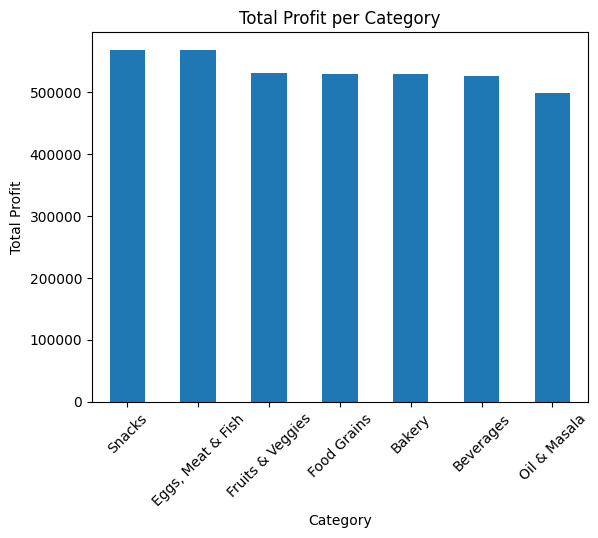

In [ ]:
profit_category = data.groupby('Category')['Profit'].sum().sort_values(ascending=False)

plt.figure()
profit_category.plot(kind='bar')
plt.title('Total Profit per Category')
plt.xlabel('Category')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.show()


➡️ Menjawab: Kategori apa yang paling menguntungkan

## 2️⃣ Region Terbaik & Terburuk

#### 📊 Chart: Total Sales per Region

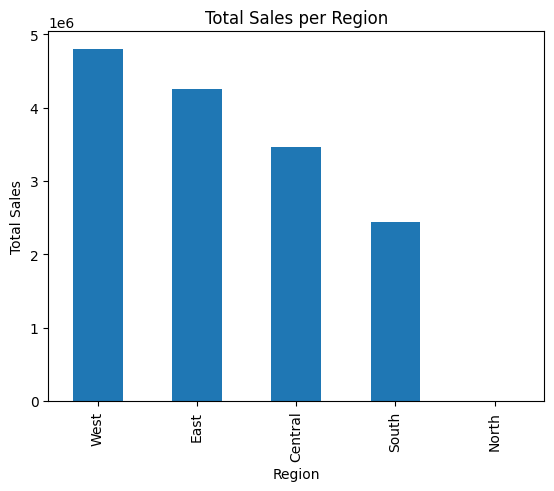

In [ ]:
sales_region = data.groupby('Region')['Sales'].sum().sort_values(ascending=False)

plt.figure()
sales_region.plot(kind='bar')
plt.title('Total Sales per Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

➡️ Menjawab: Kategori apa yang paling menguntungkan

####📊 Chart: Total Profit per Region

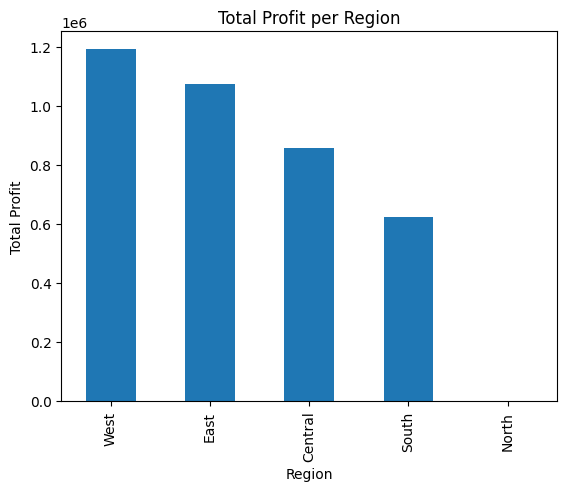

In [ ]:
profit_region = data.groupby('Region')['Profit'].sum().sort_values(ascending=False)

plt.figure()
profit_region.plot(kind='bar')
plt.title('Total Profit per Region')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.show()


➡️ Menjawab: Region terbaik & terburuk

## 3️⃣ Apakah Diskon Meningkatkan Profit?

#### 📊 Chart: Discount vs Average Profit

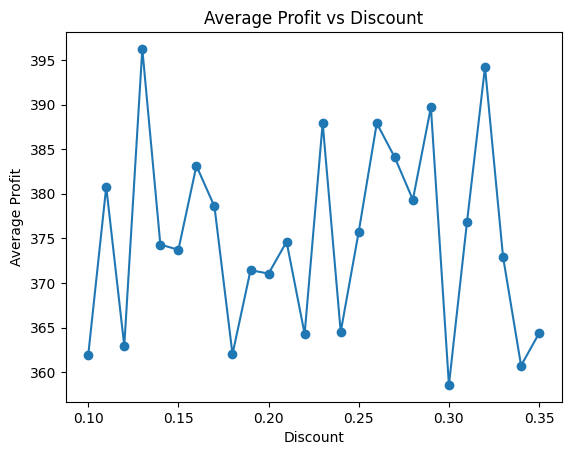

In [ ]:
discount_profit = data.groupby('Discount')['Profit'].mean()

plt.figure()
plt.plot(discount_profit.index, discount_profit.values, marker='o')
plt.title('Average Profit vs Discount')
plt.xlabel('Discount')
plt.ylabel('Average Profit')
plt.show()

➡️ Menjawab: Efektivitas diskon terhadap profit

## 4️⃣ Tren Penjualan dari Waktu ke Waktu

#### 📈 Chart: Monthly Sales Trend

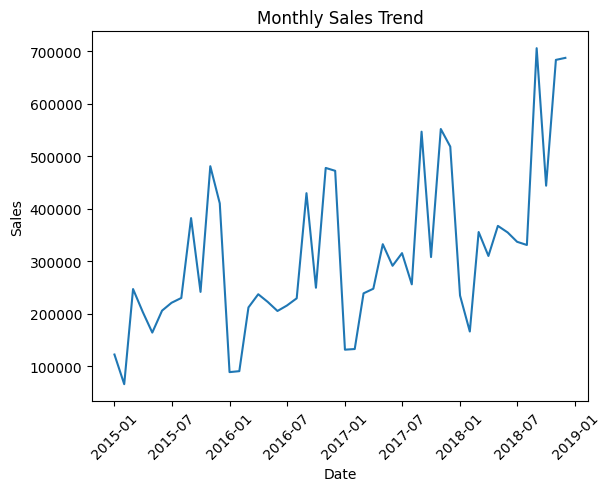

In [ ]:
monthly_sales = data.groupby(data['Order Date'].dt.to_period('M'))['Sales'].sum()
monthly_sales.index = monthly_sales.index.to_timestamp()

plt.figure()
plt.plot(monthly_sales.index, monthly_sales.values)
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()


➡️ Menjawab: Bagaimana tren penjualan dari waktu ke waktu

## 5️⃣ Sales Tinggi tapi Profit Rendah

#### 📊 Chart: Sales vs Profit per Category

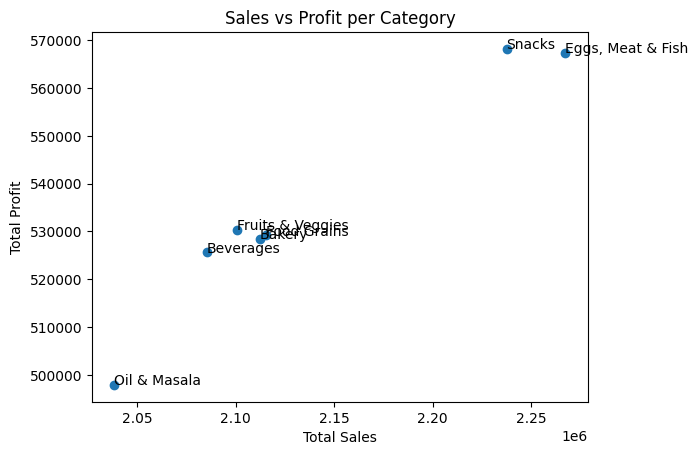

In [ ]:
category_summary = data.groupby('Category')[['Sales','Profit']].sum()

plt.figure()
plt.scatter(category_summary['Sales'], category_summary['Profit'])
plt.title('Sales vs Profit per Category')
plt.xlabel('Total Sales')
plt.ylabel('Total Profit')

for category in category_summary.index:
    plt.text(category_summary.loc[category, 'Sales'],
             category_summary.loc[category, 'Profit'],
             category)

plt.show()


➡️ Menjawab: Kategori dengan sales tinggi tapi profit relatif rendah